In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os

In [2]:
data_folder = "/Users/Emlilio/School/Internships/UR ASTRO/Data/"

In [108]:
drpall_fn = data_folder + 'MaNGA_DR17_BPT_vflag.fits'
drpall_env = Table.read(drpall_fn, format="fits",hdu=1)


In [4]:
drpall_fn = data_folder + 'drpall_ttype_R90_chi2_halpha_stellar.fits'
drpall = Table.read(drpall_fn, format="fits",hdu=1)


In [5]:
drpall_dict = {}                                    #create the dictionary

for i in range(len(drpall)):                        #looping through drpall and redefining the index in terms
    plateifu = drpall['plateifu'][i]                #of the plateifu for simplicity			
    drpall_dict[plateifu]=i

In [6]:
stellar_diag = '/Users/Emlilio/School/Internships/UR ASTRO/Data/Plots/stellar_diagnosis'
halpha_diag = '/Users/Emlilio/School/Internships/UR ASTRO/Data/Plots/diagnostic_plots'

stellar_set = []                                
data_set = []                                                    

for filename in os.listdir(stellar_diag):
        plateifu = filename.split('_')[0]
        if plateifu in drpall_dict:
            index = drpall_dict[plateifu]
            stellar_set.append(plateifu)
        else:
            continue

for filename in os.listdir(halpha_diag):
    plateifu = filename.split('_')[0]
    if plateifu in stellar_set:
        index = drpall_dict[plateifu]
        data_set.append(plateifu)
    else:
        continue

In [8]:
#data_set

In [9]:
#drpall_env[8239-12705]

here i separated the different types of galaxies into their corresponding arrays, in those arrays i stored the difference in position angle rather than the plateifu.

In [19]:
star_forming = []
composite = []
AGN = []
unclassified = []
all_gal = []

for plateifu in data_set:
    index = drpall_dict[plateifu]
    gal_class = drpall_env['BPT_class'][index]
    deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
    if deltaphi>500 or deltaphi<-500:
        continue
    all_gal.append(abs(deltaphi))
    if gal_class == 0.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        unclassified.append(abs(deltaphi))
    elif gal_class == 1.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        star_forming.append(abs(deltaphi))
    elif gal_class == 2.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        composite.append(abs(deltaphi))
    elif gal_class == 3.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        AGN.append(abs(deltaphi))
    else:
        print('error : ',index)
        continue
        


# Delta phi by gal type

Text(0.5, 1.0, 'separation by type')

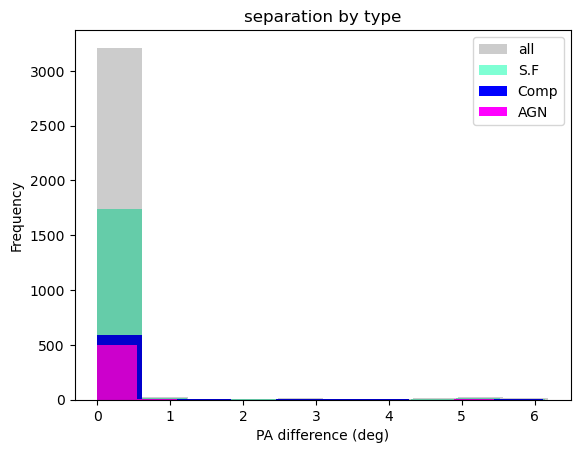

In [291]:

plt.hist(all_gal, bins = 10 , color = 'black',zorder = 5, alpha = .2, label = 'all')
plt.hist(star_forming, bins = 10, color = 'aquamarine' ,label = 'S.F')
plt.hist(composite, bins = 10, color = 'blue' , label = 'Comp')
plt.hist(AGN, bins = 10, color = 'magenta', label = 'AGN' )

plt.legend(loc='upper right', fancybox=True, framealpha=0.8, fontsize=10)

#plt.xlim(0,round(np.max(all_gal)+1))
plt.ylabel('Frequency')

plt.xlabel('PA difference (deg)')

plt.title('separation by type')

# Separation by environment

In [138]:
wall_gal = []
void_gal = []
all_env  = []
for plateifu in data_set:
    index = drpall_dict[plateifu]
    gal_class = drpall_env['BPT_class'][index]
    deltaphi = abs(drpall['stellar_PA'][index] - drpall['PA'][index])
    env_type = drpall_env['vflag_VF'][index]
    if deltaphi>500:
        continue
    all_env.append(abs(deltaphi))

    if env_type == 0.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        wall_gal.append(abs(deltaphi))
    elif env_type == 1.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        void_gal.append(abs(deltaphi))
   
    else:
        #print('error : ',index,env_type)
        continue

# Delta phi by environment

Text(0.5, 1.0, 'separation by environment')

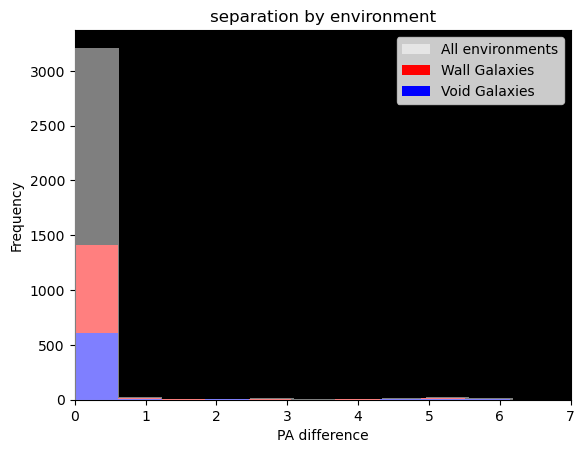

In [161]:
plt.gca().set_facecolor('black') 
plt.hist(all_env, bins = 10, color = 'white',zorder = 3, alpha = .5, label = 'All environments')
plt.hist(wall_gal, bins = 10, color = 'red' , label = 'Wall Galaxies')
plt.hist(void_gal, bins = 10, color = 'blue', label = 'Void Galaxies')

plt.legend(loc='upper right', fancybox=True, framealpha=0.8, fontsize=10)

plt.xlim(0,round(np.max(all_env)+1))
plt.ylabel('Frequency')

plt.xlabel('PA difference')

plt.title('separation by environment')

# BPT lists

In [251]:
BPT_data_x = []
BPT_data_y = []

BPT_unclass = []


BPT_star_formingx = []
BPT_star_formingy = []

BPT_compositex = []
BPT_compositey = []

BPT_AGNx = []
BPT_AGNy = []

for plateifu in data_set:
    index = drpall_dict[plateifu]
    gal_class = drpall_env['BPT_class'][index]

    n2ha = drpall_env['N2Ha'][index]
    o3hb = drpall_env['O3Hb'][index]
    if o3hb == -999.0 or n2ha == -999.0:
        continue
    BPT_data_x.append(n2ha)
    BPT_data_y.append(o3hb)

    if gal_class == 0.0:
        continue
    elif gal_class == 1.0:
        BPT_star_formingx.append(n2ha)
        BPT_star_formingy.append(o3hb)
    elif gal_class == 2.0:
        BPT_compositex.append(n2ha)
        BPT_compositey.append(o3hb)
    elif gal_class == 3.0:
        BPT_AGNx.append(n2ha)
        BPT_AGNy.append(o3hb)
    else:
        print('error : ',index)
        continue

# BPT plot

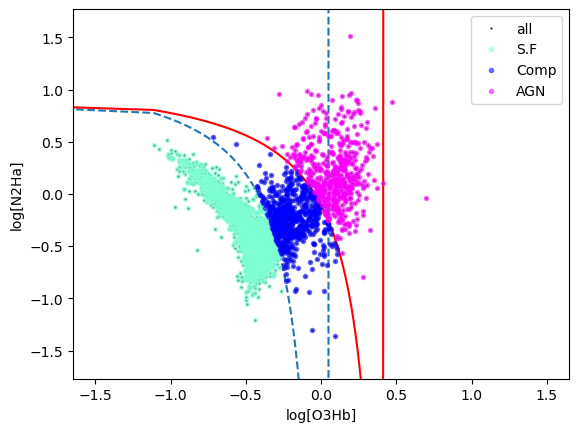

In [287]:
BPT_data_xsorted = np.sort(BPT_data_x)

Ka03 = (0.61/(np.array(BPT_data_xsorted)-0.05))+1.3 # <np.array(BPT_data_y)
Ke01 = (0.61/(np.array(BPT_data_xsorted)-0.47))+1.19 # >np.array(BPT_data_y)

#plt.gca().set_facecolor('grey') 

plt.plot(BPT_data_x,BPT_data_y, marker = '.', linestyle = '', color = 'black' ,markersize = '1',label = 'all',zorder = 1)

plt.plot( BPT_data_xsorted, Ka03, linestyle = '--')
plt.plot( BPT_data_xsorted, Ke01, linestyle = '-',color = 'red')

plt.plot(BPT_star_formingx, BPT_star_formingy, marker = '.', linestyle = '', color = 'aquamarine',alpha = .5,label = 'S.F')
plt.plot(BPT_compositex   , BPT_compositey   , marker = '.', linestyle = '', color = 'blue'      ,alpha = .5,label = 'Comp')
plt.plot(BPT_AGNx         , BPT_AGNy         , marker = '.', linestyle = '', color = 'magenta'   ,alpha = .5,label = 'AGN')

plt.legend(loc='upper right', fancybox=True, framealpha=0.8, fontsize=10, facecolor = 'white')

plt.ylim(-np.mean(BPT_data_y)-2,np.mean(BPT_data_y)+2)
plt.xlim(-np.mean(BPT_data_x)-2,np.mean(BPT_data_x)+2)
plt.xlabel('log[O3Hb]')
plt.ylabel('log[N2Ha]');

In [213]:
np.min(BPT_data_x)

np.float64(-0.35232805822189445)

# Chi2 

In [137]:
chi2_s_list = []
chi2_h_list = []
chi2_s_listc = []
chi2_h_listc = []
stellar_sysvel = []
halpha_sysvel = []
for plateifu in data_set:
    index = drpall_dict[plateifu]
    chi2_s = drpall['stellar_chi_nu'][index]
    chi2_h = drpall['chi_nu'][index]
    sys_vel_s = drpall['stellar_sys_vel'][index]
    sys_vel = drpall['sys_vel'][index]

    if chi2_s == -999 or chi2_h == -999 or sys_vel == -999:
        continue
    else:
        chi2_s_list.append(chi2_s)
        chi2_h_list.append(chi2_h)
        stellar_sysvel.append(sys_vel_s)
        halpha_sysvel.append(sys_vel)
        

    


Text(0.5, 0, 'chi2')

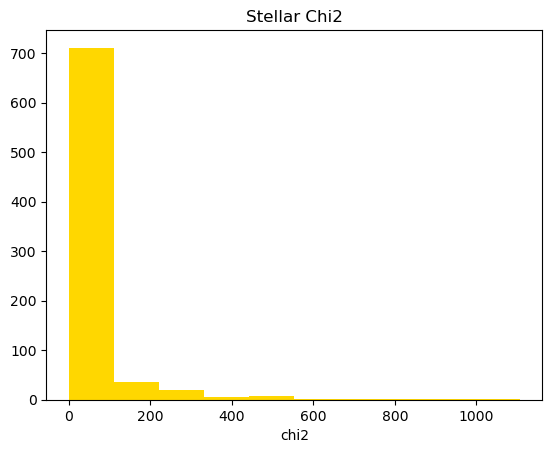

In [157]:
plt.hist(chi2_s_list, bins = 10, color = 'gold');
plt.title('Stellar Chi2')
plt.xlabel('chi2')

Text(0.5, 0, 'chi2')

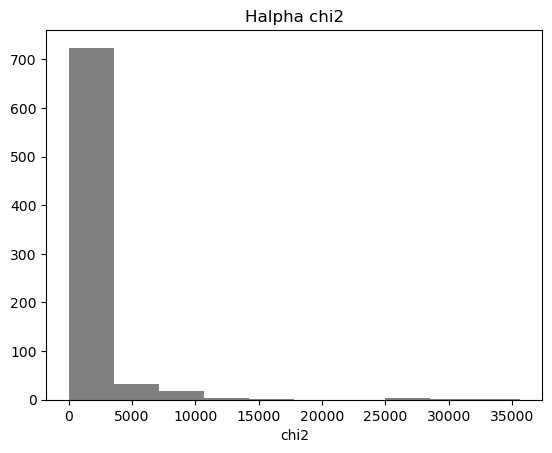

In [156]:
plt.hist(chi2_h_list, bins = 10, color = 'grey');
plt.title('Halpha chi2')
plt.xlabel('chi2')